## Finding the Hand in an Image
We will use a mask based method

### Notes for writeup
- Say i had trouble doing this with non-mask methods and with findinfg the hand in a dynamic scene

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
os.chdir('/Users/joeholt/Documents/College Local/Current/CS 639/proj') 

In [12]:
imshow = lambda im: plt.imshow(im, cmap='gray')
def imshow_group(imgs):
    f, axarr = plt.subplots(1,len(imgs), figsize=(20, 6))
    for idx, img in enumerate(imgs):
        axarr[idx].imshow(img, cmap='gray')

In [13]:
test_img_dir = os.path.join(os.getcwd(), 'test', 'test_imgs');
img_filenames = ['frame_empty.jpg', 'frame_hand_open.jpg', 'frame_hand_thumbs_up.jpg']
img_paths = [os.path.join(test_img_dir, filename) for filename in img_filenames]
print(img_paths)

['/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame_empty.jpg', '/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame_hand_open.jpg', '/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame_hand_thumbs_up.jpg']


In [15]:
imgs = [cv2.imread(path, 1) for path in img_paths]
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]
imgs_bw = [cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)[1] for grayImage in imgs_gray]

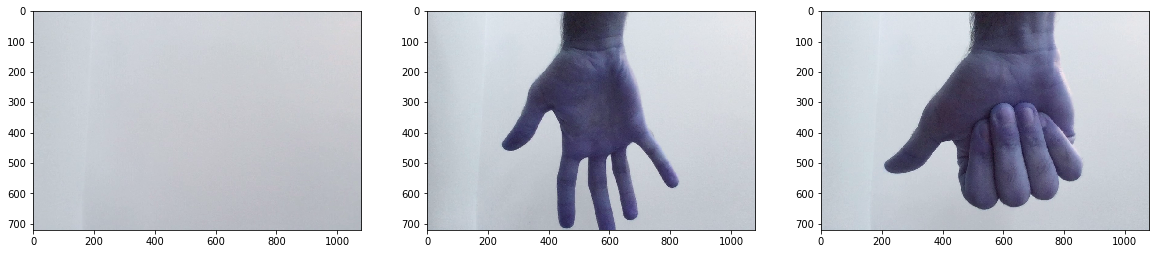

In [16]:
imshow_group(imgs)

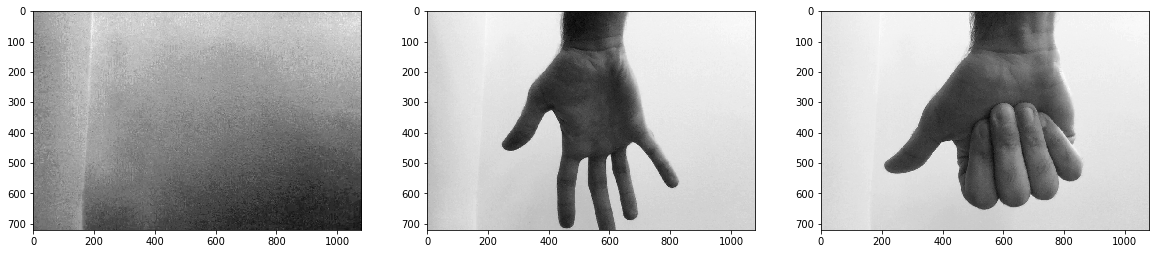

In [17]:
imshow_group(imgs_gray)

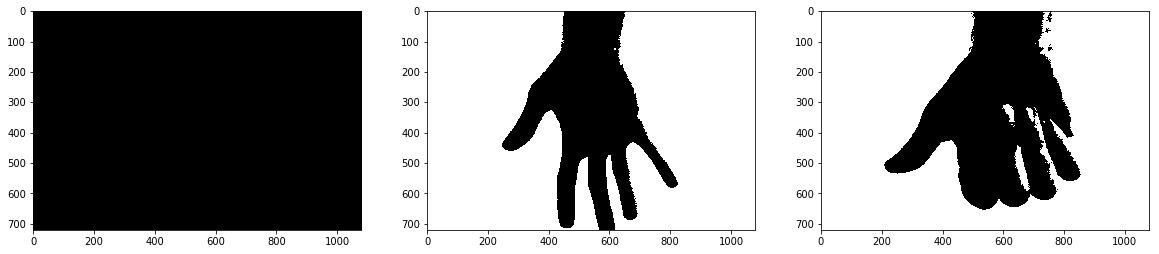

In [18]:
imshow_group(imgs_bw)

In [19]:
hand_masks = [cv2.subtract(imgs_bw[0], img) for img in imgs_bw[1:]]

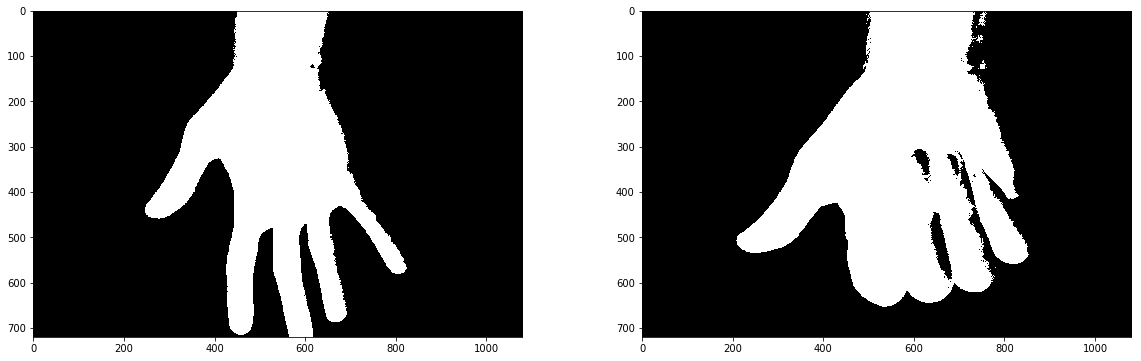

In [20]:
imshow_group(hand_masks)

## I built this into a class
I am testing it here

In [215]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
from src.HandReader import HandReader

In [217]:
test_img_dir = os.path.join(os.getcwd(), 'test', 'test_imgs');
img_filenames = ['frame_empty.jpg', 'frame_hand_open.jpg', 'frame_hand_thumbs_up.jpg']
img_paths = [os.path.join(test_img_dir, filename) for filename in img_filenames]
# label
background_img = img_paths[0]
open_hand_img = img_paths[1]
closed_hand_img = img_paths[2]

In [218]:
reader = HandReader(img_paths[0])

In [219]:
open_mask = reader.createMask(open_hand_img)

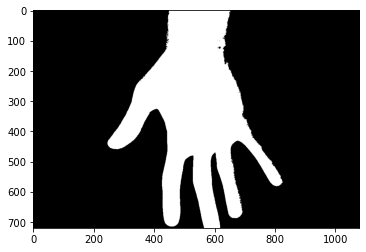

In [220]:
imshow(open_mask)

In [221]:
open_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)